# STOCK PRICE PREDICTION IN PYTHON
A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values.Sckit-learn is a free software machine learning library for the Python programming language. It features various classification,
regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means ...#we are going to use different models from the sckit-learn library to predits stock prices in the future.

# Importing Libraries

In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

In [391]:
train_data = pd.read_csv('MPBS.csv')

In [392]:
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/8/2014,7.40,7.40,7.22,7.39,7.16,4440
1,12/9/2014,7.25,7.38,7.10,7.10,6.87,4770
2,12/10/2014,7.30,7.30,7.25,7.25,7.02,1650
3,12/11/2014,7.31,7.31,7.25,7.30,7.07,1480
4,12/12/2014,7.26,7.38,7.25,7.38,7.15,8120


In [393]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2021 non-null   object 
 1   Open       2021 non-null   float64
 2   High       2021 non-null   float64
 3   Low        2021 non-null   float64
 4   Close      2021 non-null   float64
 5   Adj Close  2021 non-null   float64
 6   Volume     2021 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.7+ KB


In [394]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,4.105596,4.144295,4.066784,4.114597,3.940500,6407.540821
std,1.225857,1.230719,1.216215,1.223200,1.207483,15910.277615
min,2.120000,2.180000,2.070000,2.160000,1.980000,0.000000
25%,3.090000,3.130000,3.050000,3.090000,2.930000,470.000000
50%,4.120000,4.180000,4.100000,4.120000,3.940000,1810.000000
75%,4.820000,4.850000,4.800000,4.830000,4.640000,5820.000000
max,7.550000,7.550000,7.500000,7.500000,7.270000,236350.000000


In [395]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-08,7.40,7.40,7.22,7.39,7.16,4440
2014-12-09,7.25,7.38,7.10,7.10,6.87,4770
2014-12-10,7.30,7.30,7.25,7.25,7.02,1650
2014-12-11,7.31,7.31,7.25,7.30,7.07,1480
2014-12-12,7.26,7.38,7.25,7.38,7.15,8120


Since we are predicting stock prices at the end of each day, our label(the values to be predicted) would be the Adj. Close column in the dataset.

# Working with date

From the train_data.info(), we can see that the train_data.Date has an object data type, so we need to convert it into a datetime object

# EXPLORATORY DATA ANALYSIS

Now let's visualise the Adjusted Close

In [396]:
print(train_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


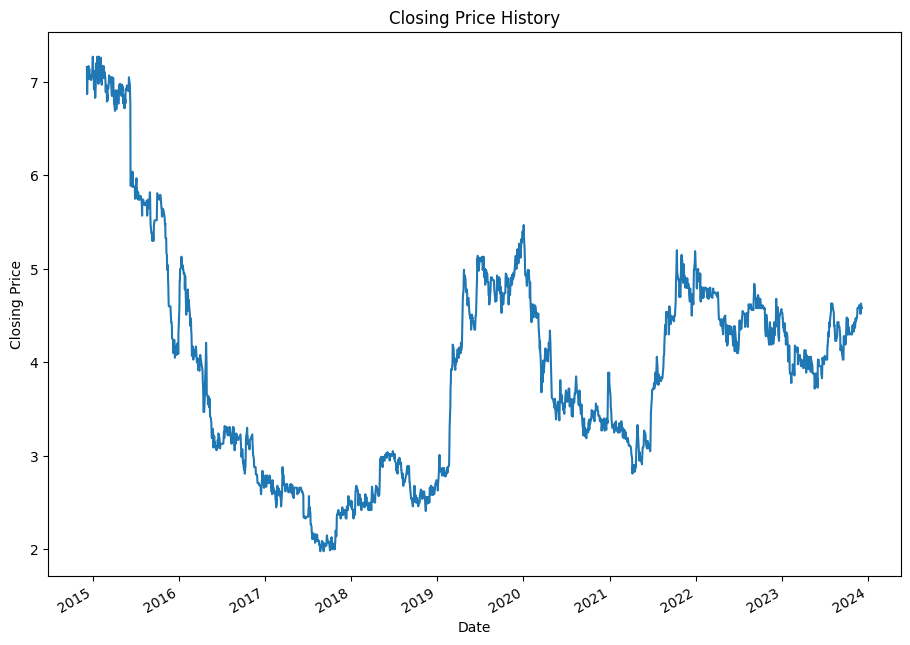

In [397]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

<Axes: >

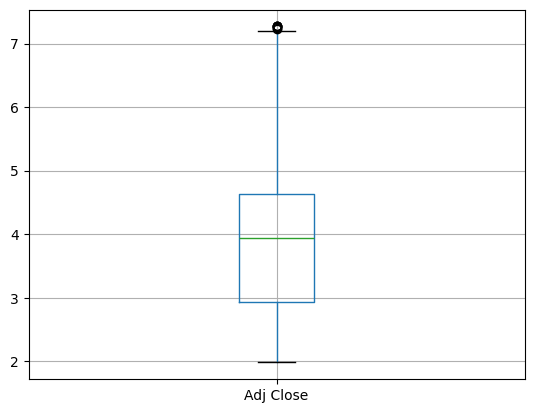

In [398]:
train_data.boxplot(column=['Adj Close'])

Visualising other columns in the dataset

<Figure size 1600x800 with 0 Axes>

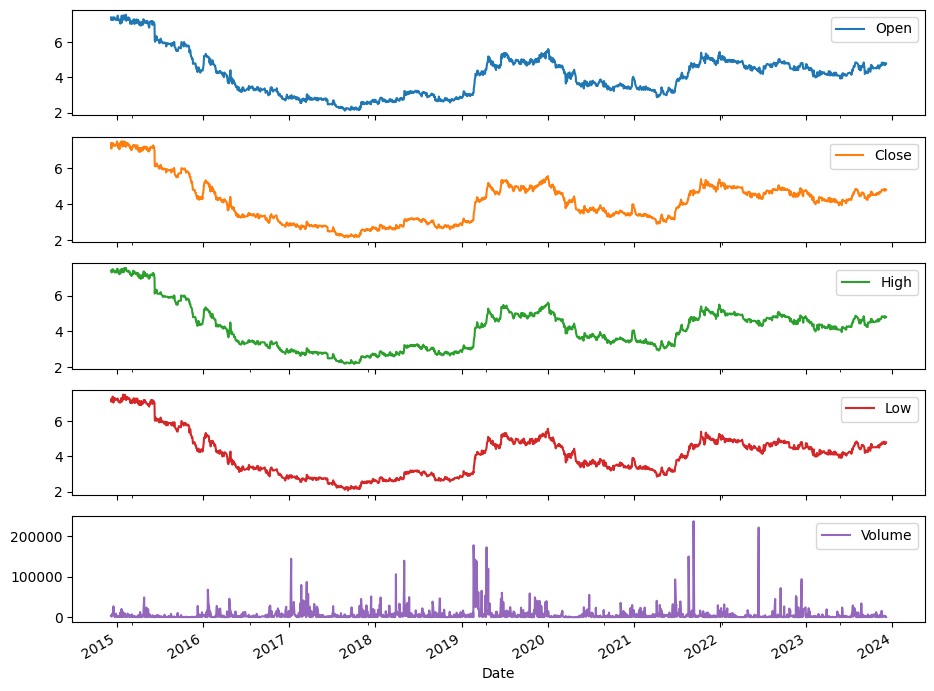

In [399]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'High', 'Low','Volume']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

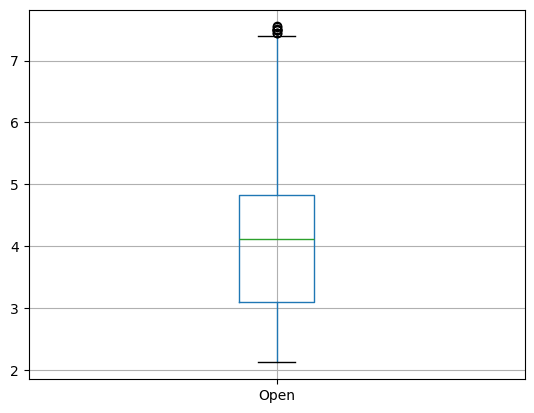

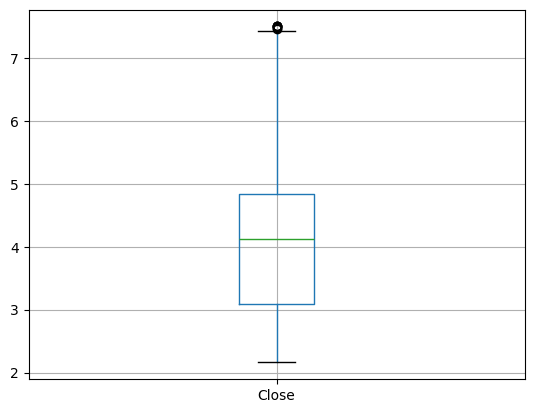

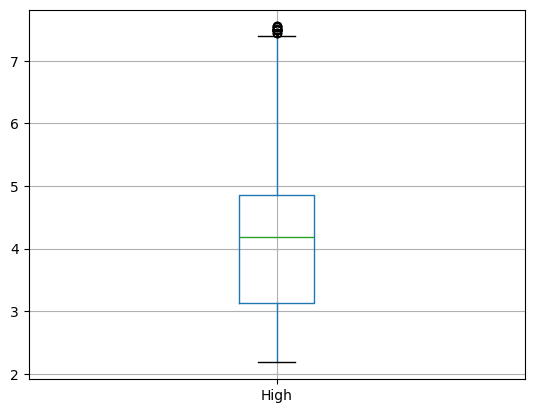

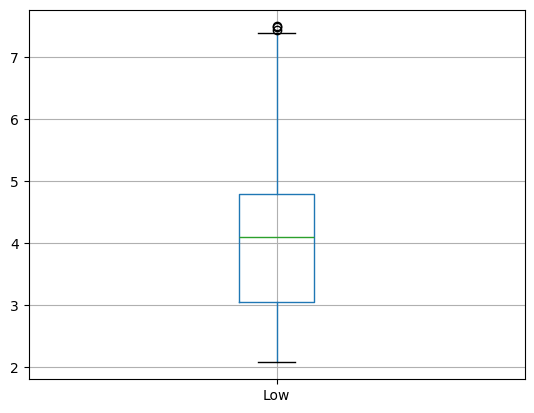

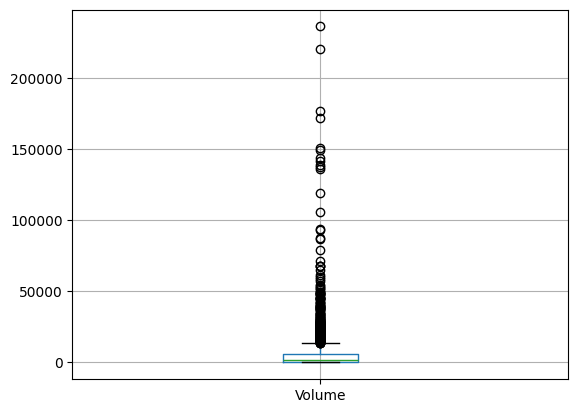

In [400]:
cols = ['Open', 'Close', 'High', 'Low','Volume']
for i in cols:
    plt.subplots()
    axes = train_data.boxplot(column= [i])
plt.show()

# Adding new features to the dataset

HL_PCT calculates for the high-low percentage for each day and the PCT_change calculates for the open-close percentage for each day. 

In [401]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0 # high-low percentage
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0 # open-close percentage

In [402]:
train_data.shape

(2021, 8)

# Checking for null values in the dataset

In [403]:
train_data.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
HL_PCT        0
PCT_change    0
dtype: int64

# Picking the features we are working with

In [404]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

# Picking forecast data

Since we want to forecast the stock prices for days and months to come, we are going to shift the Adj. Close column to create room for the predictions of the days to come.

In [405]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

102


C:\Users\Jihen\AppData\Local\Temp\ipykernel_6416\865381396.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Model building

# Import libraries

In [406]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

# Scaling the data

Now we scale the data between -1 and 1  in order to put all columns in the dataset in the same range. We will be using StandardScaler function from the preprocessing module of the sklearn library

In [407]:
scaler = StandardScaler()

In [408]:
X = np.array(df.drop(['label'], axis=1))
scaler.fit(X)
X = scaler.transform(X)

# Picking data to be predicted

In [409]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

In [410]:
X.shape

(1919, 4)

# Getting the target values

In [411]:
df.dropna(inplace=True)

C:\Users\Jihen\AppData\Local\Temp\ipykernel_6416\1379821321.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [412]:
y = np.array(df['label'])
y.shape

(1919,)

we are going to train the model with 80% of X

In [413]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now we are going to try different linear regression models and see which gives the best accuracy.

# Linear Regression

In [414]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [415]:
lr_confidence = lr.score(X_test, y_test)

In [416]:
lr_confidence

0.4297046962088761

# Random Forest

In [417]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [418]:
rf_confidence = rf.score(X_test, y_test)

In [419]:
rf_confidence

0.504511137473519

# Ridge

In [420]:
rg = Ridge()
rg.fit(X_train, y_train)

Ridge()

In [421]:
rg_confidence = rg.score(X_test, y_test)

In [422]:
rg_confidence

0.4297580017874909

# SVR

In [423]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [424]:
svr_confidence = svr.score(X_test, y_test)

In [425]:
svr_confidence

0.3935921465831308

Now that we have calculated the accuracy for 4 different models, let's visualise which models have the best accuracy.

In [426]:
names = ['Linear Regression', 'Random Forest', 'Ridge', 'SVR']
columns = ['model', 'accuracy']
scores = [lr_confidence, rf_confidence, rg_confidence, svr_confidence]
alg_vs_score = pd.DataFrame([[x, y] for x, y in zip(names, scores)], columns = columns)
alg_vs_score

,model,accuracy
0,Linear Regression,0.429705
1,Random Forest,0.504511
2,Ridge,0.429758
3,SVR,0.393592


([0, 1, 2, 3],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'Ridge'),
  Text(3, 0, 'SVR')])

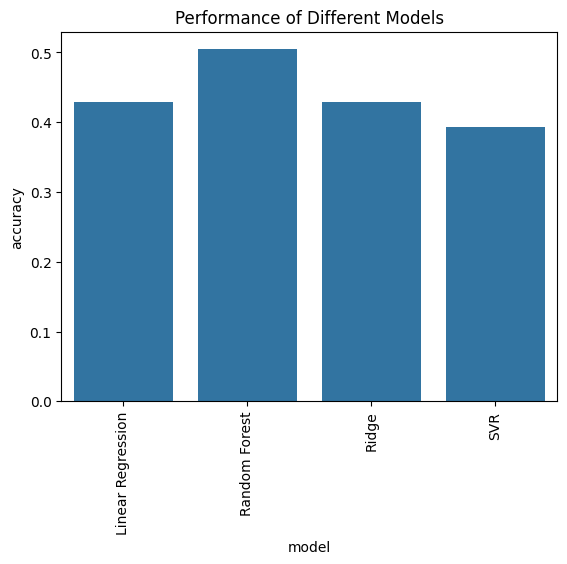

In [427]:
sns.barplot(data = alg_vs_score, x='model', y='accuracy' )
plt.title('Performance of Different Models')
plt.xticks(rotation='vertical')

The barplot shows that the RandomForestRegressor has the highest accuracy. Therefore, we would be using the model to predict our X_predict data.

# Adding the predicted data to the dataset

In [428]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_date

Timestamp('2023-05-31 00:00:00')

In [429]:
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day

In [430]:
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan

C:\Users\Jihen\AppData\Local\Temp\ipykernel_6416\312354264.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [431]:
df

,HL_PCT,PCT_change,Adj Close,Volume,label,Forecast
Date,,,,,,
2014-12-08,2.493075,-0.135135,7.16,4440,6.86,NaN
2014-12-09,3.943662,-2.068966,6.87,4770,6.77,NaN
2014-12-10,0.689655,-0.684932,7.02,1650,6.72,NaN
2014-12-11,0.827586,-0.136799,7.07,1480,6.72,NaN
2014-12-12,1.793103,1.652893,7.15,8120,6.82,NaN
...,...,...,...,...,...,...
2023-05-25,4.060914,4.060914,3.88,2570,4.52,NaN
2023-05-26,0.244499,0.244499,3.88,500,4.58,NaN
2023-05-29,0.987654,-0.977995,3.83,760,4.63,NaN


In [432]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

C:\Users\Jihen\AppData\Local\Temp\ipykernel_6416\869091167.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Jihen\AppData\Local\Temp\ipykernel_6416\869091167.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Jihen\AppData\Local\Temp\ipykernel_6416\869091167.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Jihen\AppData\Local\Temp\ipykernel_6416\869091167.py:4: SettingWithCopyWarning:


A value is tryi

# Visualizing Adj Close and the Forecast data

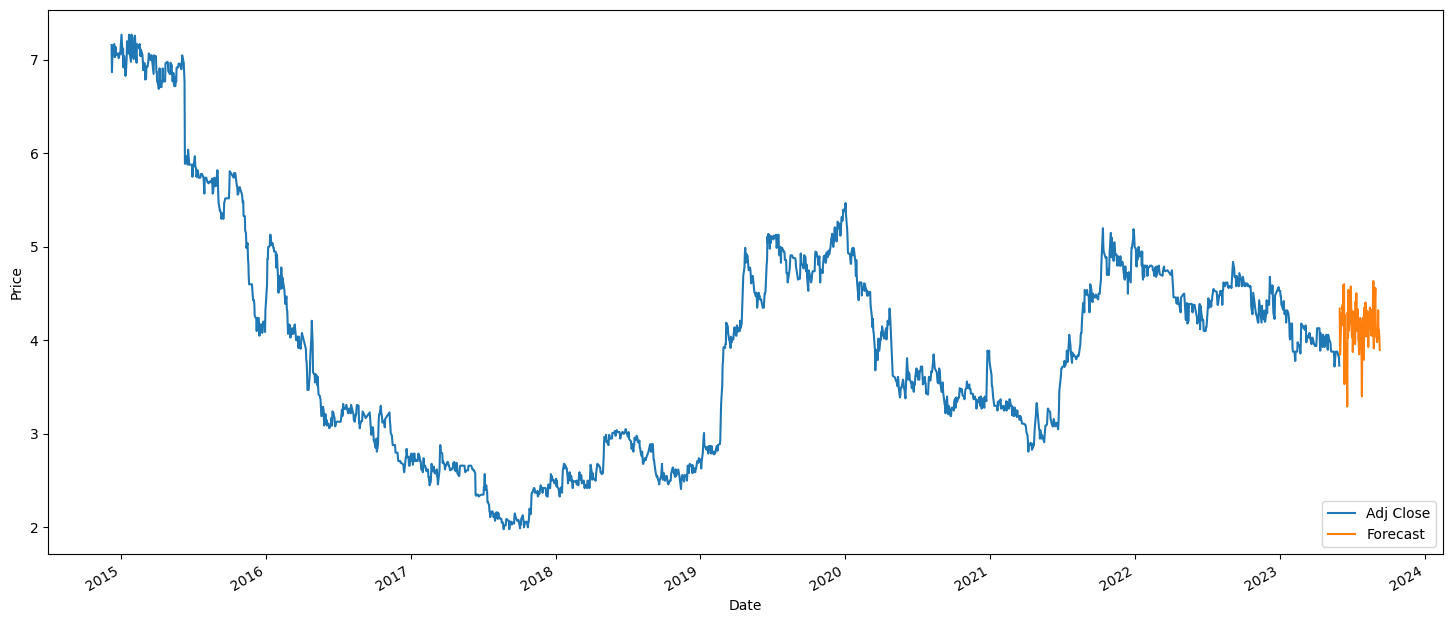

In [433]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

<Axes: xlabel='Date'>

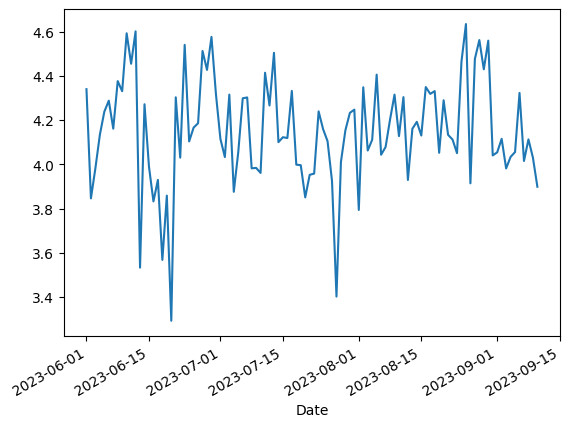

In [434]:
df['Forecast'].plot()

In [435]:
#Building a Momentum Trading Algorithm using Python

In [436]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import yfinance as yf

In [437]:
data = pd.read_csv('SAM.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data['momentum'] = data['Close'].pct_change()
data

,Open,High,Low,Close,Adj Close,Volume,momentum
Date,,,,,,,
2014-12-08,7.40,7.40,7.22,7.39,7.16,4440,NaN
2014-12-09,7.25,7.38,7.10,7.10,6.87,4770,-0.039242
2014-12-10,7.30,7.30,7.25,7.25,7.02,1650,0.021127
2014-12-11,7.31,7.31,7.25,7.30,7.07,1480,0.006897
2014-12-12,7.26,7.38,7.25,7.38,7.15,8120,0.010959
...,...,...,...,...,...,...,...
2023-11-29,4.74,4.75,4.74,4.74,4.52,3570,-0.018634
2023-11-30,4.75,4.80,4.75,4.80,4.58,680,0.012658
2023-12-01,4.70,4.85,4.70,4.85,4.63,660,0.010417


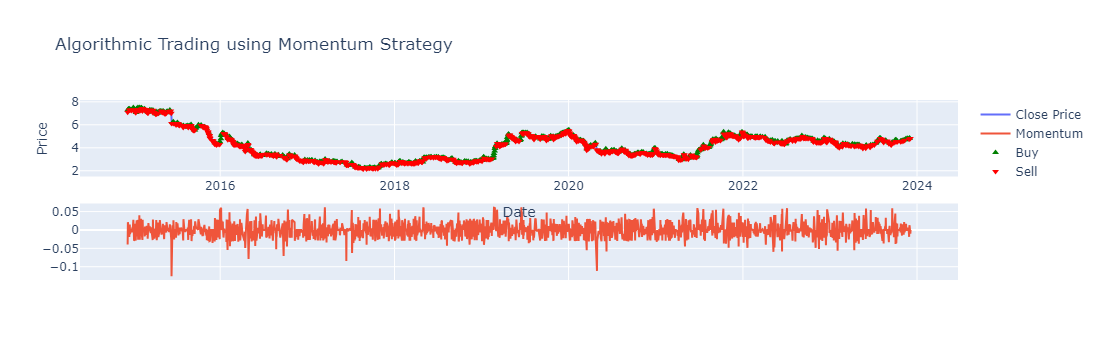

In [438]:
# Creating subplots to show momentum and buying/selling markers
figure = make_subplots(rows=2, cols=1)
figure.add_trace(go.Scatter(x=data.index, 
                         y=data['Close'], 
                         name='Close Price'))
figure.add_trace(go.Scatter(x=data.index, 
                         y=data['momentum'], 
                         name='Momentum', 
                         yaxis='y2'))

# Adding the buy and sell signals
figure.add_trace(go.Scatter(x=data.loc[data['momentum'] > 0].index, 
                         y=data.loc[data['momentum'] > 0]['Close'], 
                         mode='markers', name='Buy', 
                         marker=dict(color='green', symbol='triangle-up')))

figure.add_trace(go.Scatter(x=data.loc[data['momentum'] < 0].index, 
                         y=data.loc[data['momentum'] < 0]['Close'], 
                         mode='markers', name='Sell', 
                         marker=dict(color='red', symbol='triangle-down')))
figure.update_layout(title='Algorithmic Trading using Momentum Strategy',
                  xaxis_title='Date',
                  yaxis_title='Price')
figure.update_yaxes(title="Momentum", secondary_y=True)

In [439]:
#EMA crossover in Python

In [440]:
from finta import TA
import traceback

In [441]:
df = pd.read_csv('SAM.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [442]:
df['ema_short'] = df['Close'].ewm(span=20, adjust=False).mean()
df['ema_long'] = df['Close'].ewm(span=50, adjust=False).mean()

In [443]:
df['bullish'] = 0.0
df['bullish'] = np.where(df['ema_short'] > df['ema_long'], 1.0, 0.0)
df['crossover'] = df['bullish'].diff()

Text(0.5, 1.0, 'EMA Crossover')

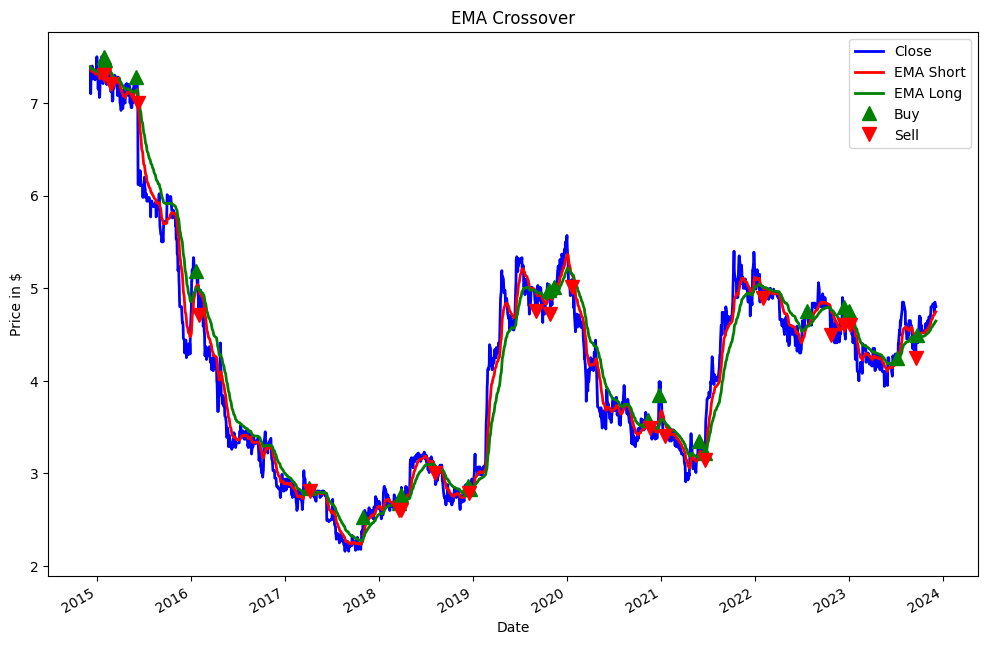

In [444]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111, ylabel='Price in $')

df['Close'].plot(ax=ax1, color='b', lw=2.)
df['ema_short'].plot(ax=ax1, color='r', lw=2.)
df['ema_long'].plot(ax=ax1, color='g', lw=2.)

ax1.plot(df.loc[df.crossover == 1.0].index, 
         df.Close[df.crossover == 1.0],
         '^', markersize=10, color='g')
ax1.plot(df.loc[df.crossover == -1.0].index, 
         df.Close[df.crossover == -1.0],
         'v', markersize=10, color='r')
plt.legend(['Close', 'EMA Short', 'EMA Long', 'Buy', 'Sell'])
plt.title('EMA Crossover')

In [445]:
df = pd.read_csv('SAM.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [446]:
#MACD 

In [447]:
# # Calculate MACD values using the pandas_ta library
# df.ta.macd(close='close', fast=12, slow=26, signal=9, append=True)
# Get the 26-day EMA of the closing price
k = df['Close'].ewm(span=12, adjust=False, min_periods=12).mean()
# Get the 12-day EMA of the closing price
d = df['Close'].ewm(span=26, adjust=False, min_periods=26).mean()
# Subtract the 26-day EMA from the 12-Day EMA to get the MACD
macd = k - d
# Get the 9-Day EMA of the MACD for the Trigger line
macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
# Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
macd_h = macd - macd_s
# Add all of our new values for the MACD to the dataframe
df['macd'] = df.index.map(macd)
df['macd_h'] = df.index.map(macd_h)
df['macd_s'] = df.index.map(macd_s)
# View our data
pd.set_option("display.max_columns", None)
print(df)

            Open  High   Low  Close  Adj Close  Volume      macd    macd_h  \
Date                                                                         
2014-12-08  7.40  7.40  7.22   7.39       7.16    4440       NaN       NaN   
2014-12-09  7.25  7.38  7.10   7.10       6.87    4770       NaN       NaN   
2014-12-10  7.30  7.30  7.25   7.25       7.02    1650       NaN       NaN   
2014-12-11  7.31  7.31  7.25   7.30       7.07    1480       NaN       NaN   
2014-12-12  7.26  7.38  7.25   7.38       7.15    8120       NaN       NaN   
...          ...   ...   ...    ...        ...     ...       ...       ...   
2023-11-29  4.74  4.75  4.74   4.74       4.52    3570  0.067107  0.005264   
2023-11-30  4.75  4.80  4.75   4.80       4.58     680  0.065688  0.003075   
2023-12-01  4.70  4.85  4.70   4.85       4.63     660  0.067816  0.004163   
2023-12-04  4.80  4.80  4.80   4.80       4.58    2000  0.064722  0.000855   
2023-12-05  4.80  4.80  4.80   4.80       4.58     600  0.061560

In [448]:
import pandas_ta as ta

In [449]:
# Calculate MACD values using the pandas_ta library
df.ta.macd(close='close', fast=12, slow=26, signal=9, append=True)
# View result
pd.set_option("display.max_columns", None)  # show all columns
print(df)

            Open  High   Low  Close  Adj Close  Volume      macd    macd_h  \
Date                                                                         
2014-12-08  7.40  7.40  7.22   7.39       7.16    4440       NaN       NaN   
2014-12-09  7.25  7.38  7.10   7.10       6.87    4770       NaN       NaN   
2014-12-10  7.30  7.30  7.25   7.25       7.02    1650       NaN       NaN   
2014-12-11  7.31  7.31  7.25   7.30       7.07    1480       NaN       NaN   
2014-12-12  7.26  7.38  7.25   7.38       7.15    8120       NaN       NaN   
...          ...   ...   ...    ...        ...     ...       ...       ...   
2023-11-29  4.74  4.75  4.74   4.74       4.52    3570  0.067107  0.005264   
2023-11-30  4.75  4.80  4.75   4.80       4.58     680  0.065688  0.003075   
2023-12-01  4.70  4.85  4.70   4.85       4.63     660  0.067816  0.004163   
2023-12-04  4.80  4.80  4.80   4.80       4.58    2000  0.064722  0.000855   
2023-12-05  4.80  4.80  4.80   4.80       4.58     600  0.061560

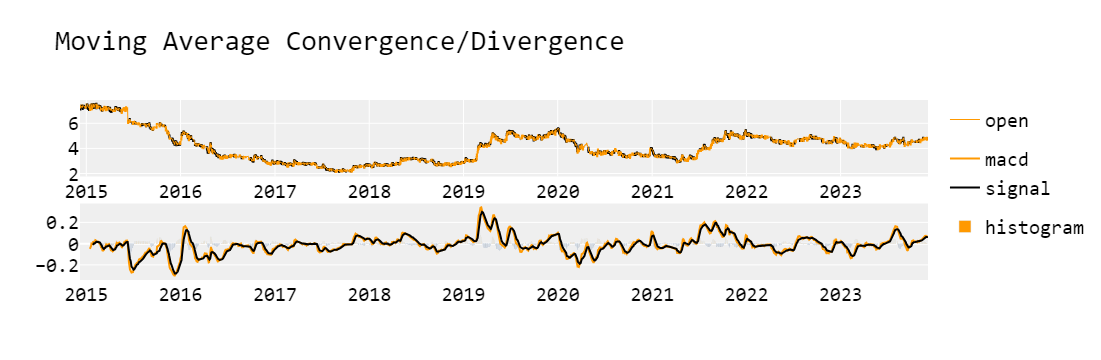

In [450]:
# calculate MACD values
df.ta.macd(close='close', fast=12, slow=26, append=True)
# Force lowercase (optional)
df.columns = [x.lower() for x in df.columns]
# Construct a 2 x 1 Plotly figure
fig = make_subplots(rows=2, cols=1)
# price Line
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['open'],
        line=dict(color='#ff9900', width=1),
        name='open',
        # showlegend=False,
        legendgroup='1',
    ), row=1, col=1
)
# Candlestick chart for pricing
fig.append_trace(
    go.Candlestick(
        x=df.index,
        open=df['open'],
        high=df['high'],
        low=df['low'],
        close=df['close'],
        increasing_line_color='#ff9900',
        decreasing_line_color='black',
        showlegend=False
    ), row=1, col=1
)
# Fast Signal (%k)
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['macd_12_26_9'],
        line=dict(color='#ff9900', width=2),
        name='macd',
        # showlegend=False,
        legendgroup='2',
    ), row=2, col=1
)
# Slow signal (%d)
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['macds_12_26_9'],
        line=dict(color='#000000', width=2),
        # showlegend=False,
        legendgroup='2',
        name='signal'
    ), row=2, col=1
)
# Colorize the histogram values
colors = np.where(df['macdh_12_26_9'] < 0, '#000', '#ff9900')
# Plot the histogram
fig.append_trace(
    go.Bar(
        x=df.index,
        y=df['macdh_12_26_9'],
        name='histogram',
        marker_color=colors,
    ), row=2, col=1
)
# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=20,
    title='Moving Average Convergence/Divergence',
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
# Update options and show plot
fig.update_layout(layout)
fig.show()